In [58]:
import pandas as pd
import numpy as np

In [62]:
uploaded = files.upload()

Saving quikr_car.csv to quikr_car (2).csv


In [65]:
df = pd.read_csv('quikr_car.csv')

In [66]:
# Overview of the dataset
print("Initial Dataset Overview:")
print(df.info())
print(df.head())

Initial Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB
None
                                     name   company  year          Price  \
0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007         80,000   
1                 Mahindra Jeep CL550 MDI  Mahindra  2006       4,25,000   
2              Maruti Suzuki Alto 800 Vxi    Maruti  2018  Ask For Price   
3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014       3,25,000   
4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014       5,75,000   

   kms_driven fuel_type  
0  45,000 kms    Petr

In [67]:
# Remove leading/trailing whitespace from column names
df.columns = df.columns.str.strip()

In [68]:
# Replace 'Ask For Price' with NaN in 'Price' column
df['Price'] = df['Price'].replace('Ask For Price', np.nan)

In [71]:
# Ensure 'Price' is treated as a string before replacing commas
df['Price'] = df['Price'].astype(str).str.replace(',', '')

In [72]:
# Convert 'Price' to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [73]:
# Remove ' kms' from 'kms_driven', replace commas, and convert to numeric
df['kms_driven'] = df['kms_driven'].str.replace(' kms', '').str.replace(',', '')
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')


In [74]:
# Fill missing values in 'Price' with the median of the column
df['Price'] = df['Price'].fillna(df['Price'].median())


In [75]:
# Fill missing values in 'kms_driven' with the median of the column
df['kms_driven'] = df['kms_driven'].fillna(df['kms_driven'].median()).astype(int)


In [76]:
# Drop duplicate rows
df = df.drop_duplicates()


In [77]:
# Check for any remaining missing values
print("\nMissing Values in Each Column After Cleaning:")
print(df.isnull().sum())


Missing Values in Each Column After Cleaning:
name           0
company        0
year           0
Price          0
kms_driven     0
fuel_type     53
dtype: int64


In [78]:
# Fill missing values in 'fuel_type' with the mode of the column
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])

In [79]:
# Check for any remaining missing values
print("\nMissing Values in Each Column After Cleaning:")
print(df.isnull().sum())


Missing Values in Each Column After Cleaning:
name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64


In [80]:
# Final cleaned dataset overview
print("\nCleaned Dataset Overview:")
print(df.info())
print(df.head())


Cleaned Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        798 non-null    object 
 1   company     798 non-null    object 
 2   year        798 non-null    object 
 3   Price       798 non-null    float64
 4   kms_driven  798 non-null    int64  
 5   fuel_type   798 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 43.6+ KB
None
                                     name   company  year     Price  \
0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007   80000.0   
1                 Mahindra Jeep CL550 MDI  Mahindra  2006  425000.0   
2              Maruti Suzuki Alto 800 Vxi    Maruti  2018  299999.0   
3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014  325000.0   
4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014  575000.0   

   kms_driven fuel_type  
0       45000    Petrol  

In [81]:
# Save cleaned dataset to a new CSV file
df.to_csv('cleaned_quik_csv.csv', index=False)

Constructing the Predictor Model

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv('cleaned_quik_csv.csv')

In [84]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['name', 'company', 'fuel_type'], drop_first=True)


In [88]:
# Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors='coerce')

In [89]:
# Drop any remaining rows with missing values
df = df.dropna()

In [90]:
# Split the dataset into features and target variable
X = df.drop('Price', axis=1)
y = df['Price']

In [91]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:
# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [93]:
# Make predictions
y_pred = model.predict(X_test)

In [101]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
accuracy = 100 - np.mean(mape) * 100

In [102]:
print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2%}")
print(f"Model Accuracy: {accuracy:.2f}%")

Model Performance:
Mean Absolute Error (MAE): 123234.40
Mean Squared Error (MSE): 40677002119.83
Root Mean Squared Error (RMSE): 201685.40
R^2 Score: 0.54
Mean Absolute Percentage Error (MAPE): 30.88%
Model Accuracy: 69.12%


In [96]:
# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)


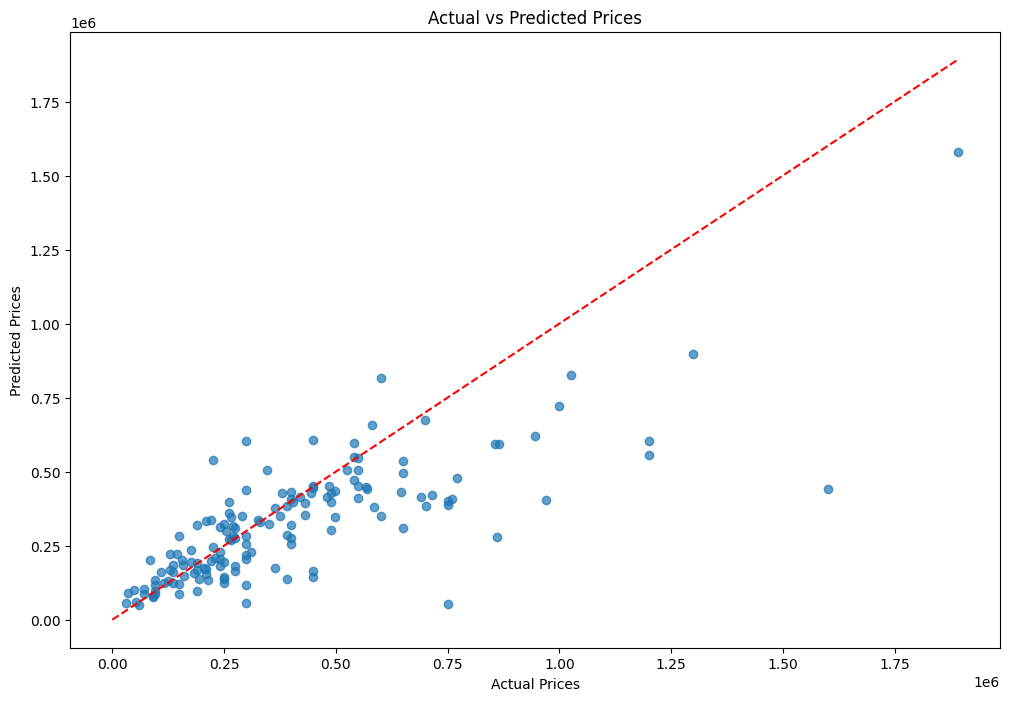

In [98]:
# Plot Actual vs Predicted Prices
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()